이미지 처리 text

In [2]:
from pydantic import BaseModel
from typing import Optional, List

class Coordinate(BaseModel):
    x: float
    y: float


class Coordinates(BaseModel):
    coordinates: list[Coordinate]


class Content(BaseModel):
    html: str
    markdown: str
    text: str


class Element(Coordinates):
    category: str
    content: Content
    id: int
    page: int
    base64_encoding: Optional[str] = None  # Base64 Encoding 필드 명시적으로 지정

    class Config:
        extra = "allow"


class Usage(BaseModel):
    pages: int


class DocumentSchema(BaseModel):
    api: str
    content: Content
    elements: list[Element]
    model: str
    usage: Usage
    
    class Config:
        extra = "allow"

In [3]:
import requests
import os

def upstage_document_parse(file_path: str) -> DocumentSchema:
    """
    Upstage API를 사용하여 문서를 파싱하는 함수

    Parameters:
        file_path (str): 파싱할 문서 파일 경로

    Returns:
        DocumentSchema: 파싱된 문서 스키마 객체 또는 파싱 실패 시 None
    """
    # API 요청 URL 및 헤더 설정
    url = "https://api.upstage.ai/v1/document-ai/document-parse"
    headers = {"Authorization": f"Bearer {os.getenv('UPSTAGE_API_KEY')}"}

    # 파일 열고 요청 데이터 준비
    with open(file_path, "rb") as f:
        files = {"document": f.read()}

    # API 요청 매개변수 설정
    data = {
        "ocr": "force",
        "base64_encoding": "['table']",
        "model": "document-parse",
        "output_formats": "['markdown']",
    }

    # API 요청 보내기
    response = requests.post(
        url,
        headers=headers,
        files=files,
        data=data,
        timeout=1000,
    )

    # 응답 확인 및 결과 반환
    if response.status_code >= 400:
        print(response.content)
        return None
    return DocumentSchema(**response.json())

In [6]:
doc = upstage_document_parse("image_test.pdf")

In [7]:
doc

DocumentSchema(api='2.0', content=Content(html='', markdown='생명보험이란\n\n# 생명보험은\n소중한 사랑입니다\n\n생명보험은\n어려운 이웃을 기꺼이 도우려는\n상부상조의 아름다운 정신에서 시작되었습니다.\n가족을 사랑하는 마음-\n이웃을 사랑하는 마음-\n나를 사랑하는 마음으로\n많은 사람들이 인생의 어려움에 좌절하지 않고\n이겨내도록 돕는 것이 생명보험 본연의 가치입니다.\n\n교보생명은\n생명보험의 진정한 가치를 통해\n이세상의 사랑이 더욱 아름답게 빛나도록\n늘 함께 하겠습니다.\n\nO\n\n생명보험\n(상부상조)\n\n따뜻한 사랑입니다\n인생의 어려움을 함께 극복해 나가는 사랑의 마음\n\n현명한 지혜입니다\n내가먼저 남을 도우면 어려울 때 나에게도 돌아오는 인생의 멋진 지혜\n\n♡\n\n2\n\n# 미리 체크해 보는 교보마이플랜건강보험 [2409](무배당)\n\n이 상품은 보장성보험이며, 은행의 예·적금과는 다른 상품이고, 저축(연금) 목적에는 적합하지 않습니다.\n\nCHECK\n\nCHECK\n\n# 무해약환급금형이란?\n\n# 01\n\n일반형 계약보다 낮은 보험료로 동일한 보장을 받을 수 있으나, 납입기간 중에는 해약환급금을 지급하지 않으며,\n보험료 납입기간이 종료된 이후에는 일반형 해약환급금 대비 적은 해약환급금을 지급하는 상품입니다.\n\n| 구분 | 납입기간 중 해약환급금 | 비 고 |\n| --- | --- | --- |\n| 무해약환급금형 | 없음 | 납입기간 종료 이후 일반형 해약환급금의 50% 지급 |\n| 일반형 | 해약환급금 지급 |  |\n\n\n※ 납입기간:보험계약일부터 이 보험을 가입할 때 보험료를 납입하기로 한 기간(년수)이 경과한 계약해당일 전일까지를 말합니다.\n다만, 보험료의 납입이 연체된 경우 보험료 총액의 납입이 완료된 기간까지를 보험료 납입기간으로 봅니다.\n\nCHECK\n\n# 무해약환급금형 여부에 따른 상품 비교\n\n# 02\n\n아래 비교자료는 

In [8]:
file_path ="image_test.pdf"

In [9]:
import fitz
fitz_doc = fitz.open(file_path) ; fitz_doc

Document('image_test.pdf')

In [10]:
from pathlib import Path

output_dir = file_path.rsplit(".")[0] ; output_dir
output_dir = Path(output_dir) ; output_dir
output_dir.mkdir(exist_ok=True)

In [11]:
texts = []
image_indexes = []
bounding_boxes = []

item_idx = 0
page_flag = 0

In [15]:
print(len(doc.elements))
doc.elements[20:30]

52


[Element(coordinates=[Coordinate(x=0.1422, y=0.3523), Coordinate(x=0.4558, y=0.3523), Coordinate(x=0.4558, y=0.3701), Coordinate(x=0.1422, y=0.3701)], category='heading1', content=Content(html='', markdown='# 무해약환급금형 여부에 따른 상품 비교', text=''), id=20, page=2, base64_encoding=None),
 Element(coordinates=[Coordinate(x=0.0752, y=0.3717), Coordinate(x=0.1312, y=0.3717), Coordinate(x=0.1312, y=0.4022), Coordinate(x=0.0752, y=0.4022)], category='heading1', content=Content(html='', markdown='# 02', text=''), id=21, page=2, base64_encoding=None),
 Element(coordinates=[Coordinate(x=0.1455, y=0.375), Coordinate(x=0.8076, y=0.375), Coordinate(x=0.8076, y=0.4062), Coordinate(x=0.1455, y=0.4062)], category='paragraph', content=Content(html='', markdown='아래 비교자료는 보험계약자의 이해를 돕기 위하여 무해약환급금형과 일반형의 주요 특징을 비교한 것이며\n세부내용은 약관 및 상품설명서를 통해 확인하시기 바랍니다.', text=''), id=22, page=2, base64_encoding=None),
 Element(coordinates=[Coordinate(x=0.1464, y=0.4103), Coordinate(x=0.9055, y=0.4103), Coordinate(x=0.9055, y=0.6

In [16]:
doc.elements[23].content.markdown.find("(/image/placeholder)")

8

In [17]:
markdown_content = doc.elements[23].content.markdown
markdown_content

'![image](/image/placeholder)\n- Chart Title: 해야환급급도해비교(순수보장형)\n- Chart Type: line\n|  | 가입 ᆞ | 납입기간 ᆞ | 20 년(60세) | 100세만기 ᆞ |\n| --- | --- | --- | --- | --- |\n| 밀리미터급명 해약환급금 | 0.3% | 0.8% | 0.3% | 0.0% |\n| 납입기간중해약환급금 | 0.3% | 0.8% | 0.9% | 0.5% |\n| 납입기간후해약환급금 | 0.3% | 0.6% | 0.8% | 0.0% |\n'

In [18]:
page_no = doc.elements[23].page
page_no

2

In [19]:
page = fitz_doc[page_no - 1]
page

page 1 of image_test.pdf

In [22]:
pix = page.get_pixmap() # fitz (PyMuPDF) 라이브러리에서 사용
pix

Pixmap(DeviceRGB, (0, 0, 596, 842), 0)

In [23]:
'''
pix는 page.get_pixmap() 메서드를 통해 생성된 이미지 객체 (Pixmap)

DeviceRGB:
이미지의 색상 모드를 나타냅니다.
DeviceRGB는 3채널 (Red, Green, Blue) 이미지를 의미합니다.

DeviceGray: 흑백(그레이스케일)
DeviceCMYK: CMYK (프린터 색상 모드)
DeviceRGBA: RGBA (Red, Green, Blue + Alpha - 투명도)

(0, 0, 596, 842):
이미지의 크기와 위치를 나타내는 **사각형 좌표 (Rect)**입니다.
형식: (left, top, right, bottom)
이 예제에서:
left = 0 (이미지의 좌측)
top = 0 (이미지의 상단)
right = 596 (이미지의 너비)
bottom = 842 (이미지의 높이)

0:
페이지의 회전 각도를 의미합니다.
0이면 회전 없이 기본 방향으로 출력됩니다.
'''

'\npix는 page.get_pixmap() 메서드를 통해 생성된 이미지 객체 (Pixmap)\n\nDeviceRGB:\n이미지의 색상 모드를 나타냅니다.\nDeviceRGB는 3채널 (Red, Green, Blue) 이미지를 의미합니다.\n\nDeviceGray: 흑백(그레이스케일)\nDeviceCMYK: CMYK (프린터 색상 모드)\nDeviceRGBA: RGBA (Red, Green, Blue + Alpha - 투명도)\n\n(0, 0, 596, 842):\n이미지의 크기와 위치를 나타내는 **사각형 좌표 (Rect)**입니다.\n형식: (left, top, right, bottom)\n이 예제에서:\nleft = 0 (이미지의 좌측)\ntop = 0 (이미지의 상단)\nright = 596 (이미지의 너비)\nbottom = 842 (이미지의 높이)\n\n0:\n페이지의 회전 각도를 의미합니다.\n0이면 회전 없이 기본 방향으로 출력됩니다.\n'

In [24]:
pix.width, pix.height

(596, 842)

In [25]:
print(pix.samples[:10])

b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff'


In [26]:
from PIL import Image

image = Image.frombytes(
    mode = "RGB",
    size = [pix.width, pix.height],
    data = pix.samples
)

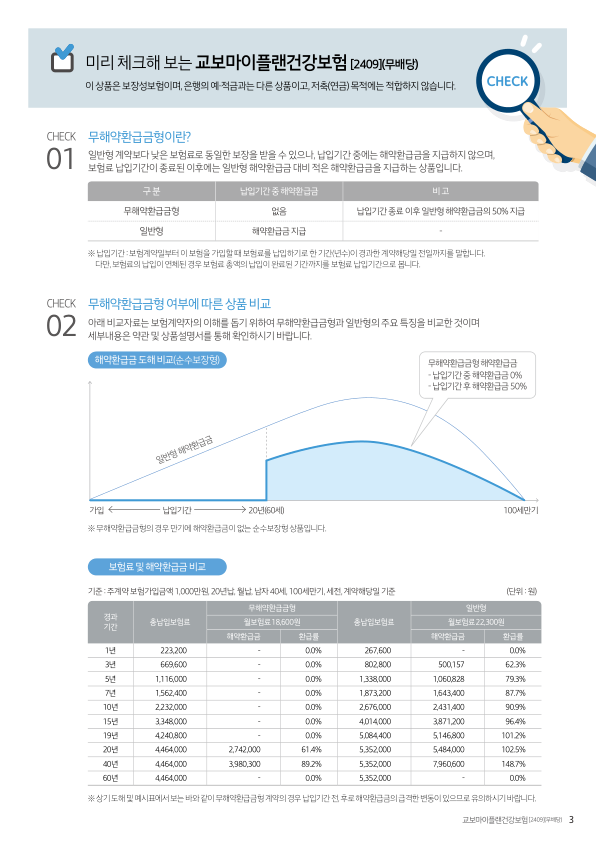

In [27]:
image

In [28]:
image.show()

In [29]:
element = doc.elements[23] ; element

Element(coordinates=[Coordinate(x=0.1464, y=0.4103), Coordinate(x=0.9055, y=0.4103), Coordinate(x=0.9055, y=0.6214), Coordinate(x=0.1464, y=0.6214)], category='chart', content=Content(html='', markdown='![image](/image/placeholder)\n- Chart Title: 해야환급급도해비교(순수보장형)\n- Chart Type: line\n|  | 가입 ᆞ | 납입기간 ᆞ | 20 년(60세) | 100세만기 ᆞ |\n| --- | --- | --- | --- | --- |\n| 밀리미터급명 해약환급금 | 0.3% | 0.8% | 0.3% | 0.0% |\n| 납입기간중해약환급금 | 0.3% | 0.8% | 0.9% | 0.5% |\n| 납입기간후해약환급금 | 0.3% | 0.6% | 0.8% | 0.0% |\n', text=''), id=23, page=2, base64_encoding=None)

In [30]:
def extract_bounding_box(element: Element, width: float, height: float):
    """
    `요소`의 `좌표 정보`를 기반으로 `바운딩 박스 정보`를 추출하는 함수

    Parameters:
        element (Element): 바운딩 박스를 추출할 문서 요소
        width (float): 원본 이미지 너비
        height (float): 원본 이미지 높이

    Returns:
        dict: `바운딩 박스 정보`를 담은 딕셔너리
    """
    # 요소 좌표에서 x값과 y값을 각각 추출
    x_values = [coord.x for coord in element.coordinates]
    y_values = [coord.y for coord in element.coordinates]

    # 바운딩 박스 정보 생성 및 반환
    return {
        "left": min(x_values) * width,
        "top": min(y_values) * height,
        "right": max(x_values) * width,
        "bottom": max(y_values) * height,
        "coord_origin": "BOTTOMLEFT",
    }

In [31]:
bounding_box = extract_bounding_box(element, pix.width, pix.height)
bounding_box


{'left': 87.2544,
 'top': 345.4726,
 'right': 539.678,
 'bottom': 523.2188,
 'coord_origin': 'BOTTOMLEFT'}

In [32]:
bbox = (
    bounding_box["left"],
    bounding_box["top"],
    bounding_box["right"],
    bounding_box["bottom"],
)
bbox

(87.2544, 345.4726, 539.678, 523.2188)

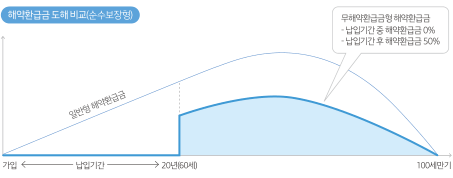

In [33]:
cropped_image = image.crop(bbox)
cropped_image

In [34]:
if page_flag == page_no:
    item_idx += 1
else:
    page_flag = page_no
    item_idx = 0

In [35]:
path_temp =output_dir / f"image_{page_no}_{item_idx}.png"
path_temp


WindowsPath('image_test/image_2_0.png')

In [36]:
element_image_filename = path_temp.as_posix()
element_image_filename

'image_test/image_2_0.png'

In [37]:
bounding_box["file_page_no"] = page_no
bounding_box["width"] = cropped_image.width
bounding_box["height"] = cropped_image.height
bounding_box["path"] = str(element_image_filename).split("upload")[-1]

In [38]:
str(element_image_filename)

'image_test/image_2_0.png'

In [39]:
bounding_box

{'left': 87.2544,
 'top': 345.4726,
 'right': 539.678,
 'bottom': 523.2188,
 'coord_origin': 'BOTTOMLEFT',
 'file_page_no': 2,
 'width': 453,
 'height': 178,
 'path': 'image_test/image_2_0.png'}

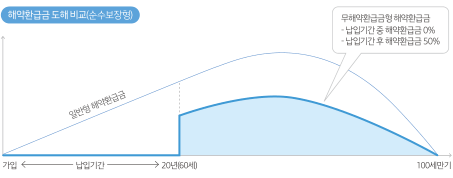

In [40]:
cropped_image

In [41]:
cropped_image.save(element_image_filename)

In [42]:
image.close()

In [43]:
image

<PIL.Image.Image image mode=RGB size=596x842>

In [44]:
pix

Pixmap(DeviceRGB, (0, 0, 596, 842), 0)

In [45]:
pix = None

In [46]:
pix

In [47]:
fitz_doc.close()

In [48]:
fitz_doc

closed Document('image_test.pdf')